In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# !------------------- 1 - Data Collection ------------------------!

In [2]:
df = pd.read_csv('UNSW_NB15_training-set 1.csv')  
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# 2. EDA - Exploratory Data Analysis
"""

In EDA we have first checked the length and shape of the dataset and we have found that the dataset have 82332 records with 45 columns. 

After checking length and the columns we have checked the statistics of the data data and the corellation between each columns, and the results are shown below. 

After that we have checked the data-type of each columns to check categorical and numerical columns which will be helpfull in our Data Pre-processing step.  

"""

In [3]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
len(df)

82332

In [5]:
df.shape

(82332, 45)

In [6]:
# 2. Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = df.describe()

# Correlation matrix
correlation_matrix = df.corr()

summary_stats

C:\Users\Zawwar\AppData\Local\Temp\ipykernel_9552\379527192.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
correlation_matrix

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [9]:
# checking the number of missing values
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

# In our label column we have normal values encoded as 0 and abnormal values as 1

In [10]:
print(df['label'].value_counts())

1    45332
0    37000
Name: label, dtype: int64


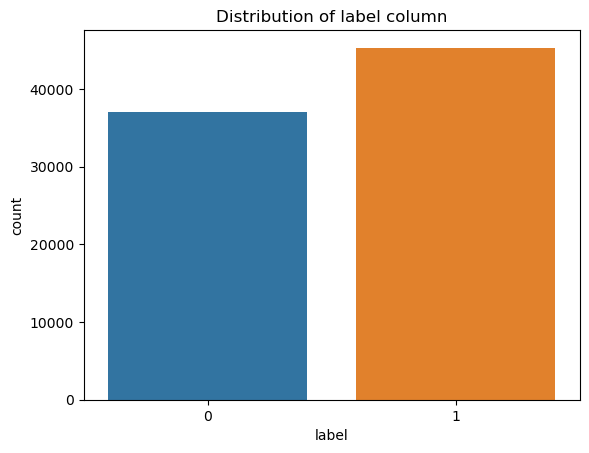

In [11]:
# Checking the distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Distribution of label column')
plt.show()

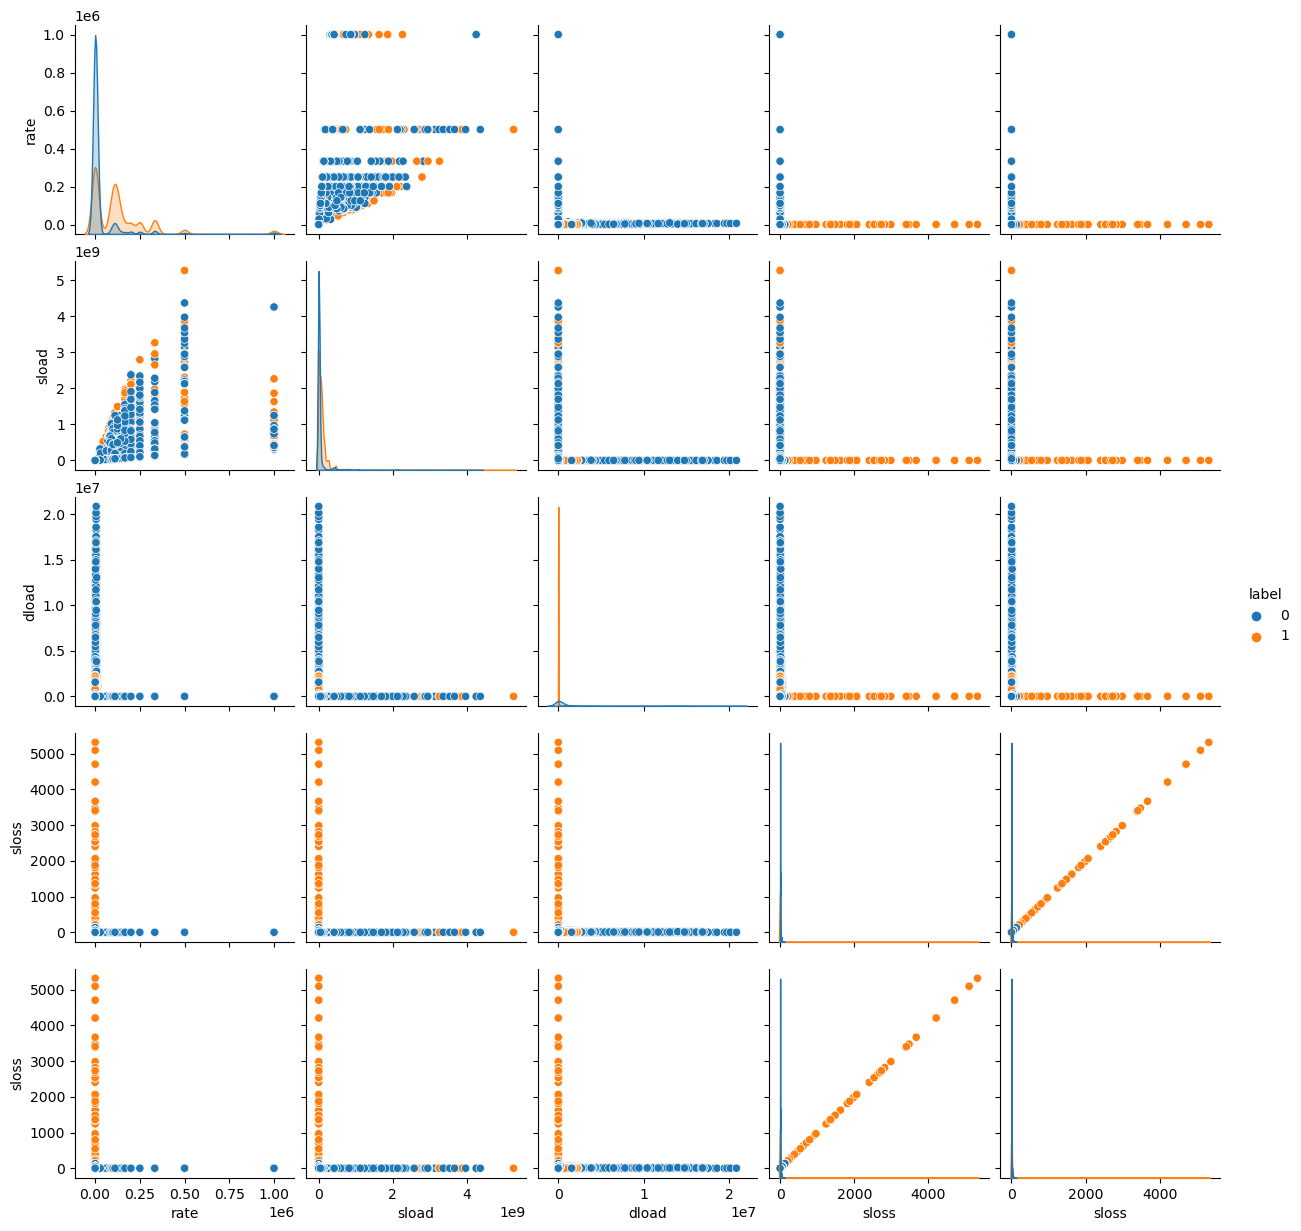

In [12]:
sns.pairplot(df, hue = 'label',
             vars = ['rate', 'sload', 'dload', 
                     'sloss', 'sloss'] )

# 3. Data Pre-processing and Validation

"""

 - The data pre-processing step includes: conversion of categorical columns into numerical values which is in our case is "label".

 - After that we have applied train_test_split to split the dataset into training and testing data. We have splitted the dataset 
into 80% for training and 20% for testing. 
 - After that we have used standard scaler to stenderdise or normalise our numerical data. This step is mendatory to ensure that our data is on one scale. This is step is used while model training.

"""

In [5]:
# Dropping Null rows
df = df.dropna(axis=0)

df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
df['proto'].value_counts()

proto
tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: count, Length: 131, dtype: int64

In [10]:
df['service'].value_counts()

service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64

# Encoding Categorical features into numerical format 

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your dataframe and these are the remaining categorical columns
categorical_columns = ['proto', 'state']

encoded_df = pd.DataFrame()
encoded_df = df

# Apply Label Encoding for ordinal columns
label_encoder = LabelEncoder()

encoded_df[categorical_columns[0]] = label_encoder.fit_transform(encoded_df[categorical_columns[0]])
encoded_df[categorical_columns[1]] = label_encoder.fit_transform(encoded_df[categorical_columns[1]])


encoded_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,-,4,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,117,-,4,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,117,-,4,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,117,-,4,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,117,-,4,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,117,-,4,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,111,-,3,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,6,-,4,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,6,-,4,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


# Dropping Un-necessary columns from the dataset 

In [9]:
df_dropped = encoded_df.drop(['id', 'service', 'attack_cat'], axis=1)

df_dropped

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,117,4,2,0,496,0,90909.090200,254,0,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,117,4,2,0,1762,0,125000.000300,254,0,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,117,4,2,0,1068,0,200000.005100,254,0,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,117,4,2,0,900,0,166666.660800,254,0,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,117,4,2,0,2126,0,100000.002500,254,0,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,117,4,2,0,104,0,200000.005100,254,0,...,1,1,2,0,0,0,2,1,0,0
82328,1.106101,111,3,20,8,18062,354,24.410067,254,252,...,1,1,1,0,0,0,3,2,0,0
82329,0.000000,6,4,1,0,46,0,0.000000,0,0,...,1,1,1,0,0,0,1,1,1,0
82330,0.000000,6,4,1,0,46,0,0.000000,0,0,...,1,1,1,0,0,0,1,1,1,0


# Taking only a sample of data by selecting 10k random rows from each output class

In [11]:
min_sample = 10000


balanced_df = df_dropped.groupby('label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)

balanced_df

C:\Users\pc\AppData\Local\Temp\ipykernel_17864\3447180210.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df_dropped.groupby('label').apply(lambda x: x.sample(min_sample)).reset_index(drop=True)


,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.497964,111,3,10,6,718,268,30.122660,254,252,...,1,1,3,0,0,0,3,3,0,0
1,0.822355,111,3,8,12,424,8824,23.104378,31,29,...,1,1,1,0,0,0,3,2,0,0
2,0.194717,111,3,84,86,4862,80646,867.926251,31,29,...,1,1,1,0,0,0,3,12,0,0
3,1.485889,111,3,10,10,830,1256,12.786958,62,252,...,1,1,2,0,0,1,3,1,0,0
4,0.036221,111,3,16,18,1540,1644,911.073654,31,29,...,5,1,5,0,0,0,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.860327,111,3,8,6,364,268,15.110533,62,252,...,1,1,2,0,0,0,2,1,0,1
19996,0.242016,111,3,12,20,920,20038,128.090703,62,252,...,1,1,1,0,0,1,1,1,0,1
19997,0.000002,118,4,2,0,200,0,500000.001300,254,0,...,2,2,3,0,0,0,8,15,0,1
19998,0.848628,111,3,10,8,564,354,20.032335,254,252,...,1,1,1,0,0,0,1,1,0,1


In [46]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                20000 non-null  float64
 1   proto              20000 non-null  int32  
 2   state              20000 non-null  int32  
 3   spkts              20000 non-null  int64  
 4   dpkts              20000 non-null  int64  
 5   sbytes             20000 non-null  int64  
 6   dbytes             20000 non-null  int64  
 7   rate               20000 non-null  float64
 8   sttl               20000 non-null  int64  
 9   dttl               20000 non-null  int64  
 10  sload              20000 non-null  float64
 11  dload              20000 non-null  float64
 12  sloss              20000 non-null  int64  
 13  dloss              20000 non-null  int64  
 14  sinpkt             20000 non-null  float64
 15  dinpkt             20000 non-null  float64
 16  sjit               200

In [108]:
balanced_df.to_csv('cleaned_UNSW15_dataset_new.csv')

# !-------------------- 4 - feature extractrion and data split ----------------!¶

In [13]:
# Define X (features) and y (target)
X = balanced_df.drop('label', axis=1)  # Drop the label column to get the features
y = balanced_df['label']  # Target variable 'label'


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standerdizing feature

In [16]:
# Standerdizing feature for Supervised Learning phase
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP = scaler.transform(X)

# Train a RandomForestClassifier model to get relevent features

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


# Get feature importances
importances = model.feature_importances_

print(importances)

[3.17518425e-02 6.30997976e-03 2.73362898e-02 7.45345324e-03
 1.76958231e-02 6.20193130e-02 2.92042232e-02 5.80228209e-02
 7.55211007e-02 2.40267957e-02 7.23036581e-02 2.70235689e-02
 1.42401433e-02 6.47702923e-03 1.88763943e-02 2.24976452e-02
 1.00107296e-02 8.70946224e-03 5.12445671e-03 6.28531122e-03
 6.63542660e-03 1.07704078e-04 2.95871881e-02 2.32075232e-02
 2.02295918e-02 4.94163371e-02 1.99212290e-02 1.63478643e-03
 3.57296071e-03 2.40150396e-02 4.85586935e-02 8.93894567e-03
 1.02012211e-02 6.94860809e-02 8.53695637e-02 6.85577038e-05
 2.59883363e-05 1.65959565e-03 8.55790317e-03 5.70336648e-02
 8.81958094e-04]


# Create a DataFrame to display feature importances alongside their column names

Feature Importance:
               Feature  Importance
34     ct_dst_src_ltm    0.085370
8                sttl    0.075521
10              sload    0.072304
33   ct_dst_sport_ltm    0.069486
5              sbytes    0.062019
7                rate    0.058023
39         ct_srv_dst    0.057034
25              smean    0.049416
30       ct_state_ttl    0.048559
0                 dur    0.031752
22             tcprtt    0.029587
6              dbytes    0.029204
2               state    0.027336
11              dload    0.027024
9                dttl    0.024027
29         ct_srv_src    0.024015
23             synack    0.023208
15             dinpkt    0.022498
24             ackdat    0.020230
26              dmean    0.019921
14             sinpkt    0.018876
4               dpkts    0.017696
12              sloss    0.014240
32   ct_src_dport_ltm    0.010201
16               sjit    0.010011
31         ct_dst_ltm    0.008939
17               djit    0.008709
38         ct_src_ltm    0.

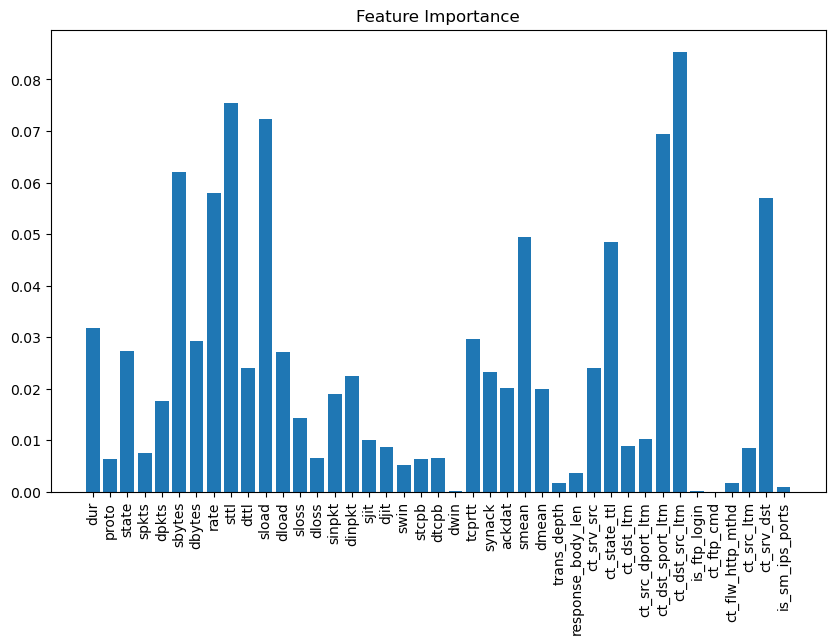

In [20]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})


# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance_df)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

# Select features and creating new X dataset by selecting columns as per the feature importance

In [23]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(model, threshold="median", prefit=True)  # Only features with importance above mean are kept
X_selected = selector.transform(X)  # This will give the transformed dataset with selected features

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:\n", selected_features)

Selected Features:
 Index(['dur', 'state', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
       'dload', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
X_sel_features = X[selected_features]

X_sel_features

,dur,state,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,...,tcprtt,synack,ackdat,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst
0,0.497964,3,718,268,30.122660,254,252,1.039433e+04,3.598654e+03,49.938889,...,0.122182,0.056369,0.065813,72,45,12,1,1,3,3
1,0.822355,3,424,8824,23.104378,31,29,3.609147e+03,7.869108e+04,117.428004,...,0.000622,0.000497,0.000125,53,735,2,0,1,1,2
2,0.194717,3,4862,80646,867.926251,31,29,1.974147e+05,3.274866e+06,2.341783,...,0.000568,0.000455,0.000113,58,938,9,0,1,1,12
3,1.485889,3,830,1256,12.786958,62,252,4.021835e+03,6.089284e+03,165.084778,...,0.222406,0.130370,0.092036,83,126,1,1,1,2,1
4,0.036221,3,1540,1644,911.073654,31,29,3.189310e+05,3.430054e+05,2.393400,...,0.000752,0.000585,0.000167,96,91,10,0,1,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.860327,3,364,268,15.110533,62,252,2.966314e+03,2.082929e+03,122.903862,...,0.153821,0.066388,0.087433,46,45,1,1,1,2,1
19996,0.242016,3,920,20038,128.090703,62,252,2.789898e+04,6.292807e+05,22.001454,...,0.051000,0.006026,0.044974,77,1002,1,1,1,1,1
19997,0.000002,4,200,0,500000.001300,254,0,4.000000e+08,0.000000e+00,0.002000,...,0.000000,0.000000,0.000000,100,0,15,2,2,3,15
19998,0.848628,3,564,354,20.032335,254,252,4.788906e+03,2.922364e+03,92.161111,...,0.099859,0.036834,0.063025,56,44,1,1,1,1,1


# Splitting the dataset for selected features and doing Scaling of selected features

In [28]:
# Split data into training and test sets
X_train_sel_features, X_test_sel_features, y_train_sel_features, y_test_sel_features = train_test_split(
    X_sel_features, y, test_size=0.2, random_state=42
)

X_train_sel_features

,dur,state,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,...,tcprtt,synack,ackdat,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst
5894,0.046319,3,320,1860,280.662361,31,29,4.611498e+04,2.811805e+05,9.197800,...,0.000679,0.000545,0.000134,53,233,3,0,1,1,3
3728,0.001109,2,130,162,2705.139897,31,29,4.688909e+05,5.843102e+05,0.008000,...,0.000000,0.000000,0.000000,65,81,5,0,1,1,4
8958,0.012848,3,2766,24004,6927.148172,31,29,1.683686e+06,1.462204e+07,0.291000,...,0.000672,0.000528,0.000144,63,522,8,0,1,1,8
7671,0.042919,3,2854,30622,2166.872544,31,29,5.204222e+05,5.589133e+06,0.945711,...,0.001383,0.001229,0.000154,62,638,8,0,1,1,7
5999,1.086936,3,534,354,15.640295,254,252,3.540227e+03,2.281643e+03,120.670667,...,0.138859,0.080720,0.058139,53,44,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.840747,3,364,712,17.841277,62,252,3.035396e+03,5.928062e+03,120.106710,...,0.123607,0.062164,0.061443,46,89,1,1,1,1,1
11964,0.192975,3,860,268,77.730276,254,252,3.208706e+04,9.286177e+03,19.943444,...,0.050006,0.006777,0.043229,86,45,1,1,1,1,1
5390,0.001108,2,132,164,2707.581093,31,29,4.765343e+05,5.920578e+05,0.010000,...,0.000000,0.000000,0.000000,66,82,2,0,1,1,2
860,0.369883,3,486,268,40.553364,254,252,9.473266e+03,4.844775e+03,41.098111,...,0.077239,0.039569,0.037670,49,45,11,1,3,11,12


# Standerdizing selected feature for further model training process

In [30]:
# Standerdizing feature for Supervised Learning phase
scaler_sel_features = StandardScaler()

X_train_scaled_sel_features = scaler_sel_features.fit_transform(X_train_sel_features)
X_test_scaled_sel_features = scaler_sel_features.transform(X_test_sel_features)

# Standerdizing feature for UN-Supervised Learning phase
X_scaled_USP_sel_features = scaler_sel_features.transform(X_sel_features)

# ! -------- 5 - Un-Supervised Learning Phase -- Clustering and PCA -------------!

# Also Calculating silhouette score and Doing Visualisation

Silhouette Score - K-means: 0.3034070011223224


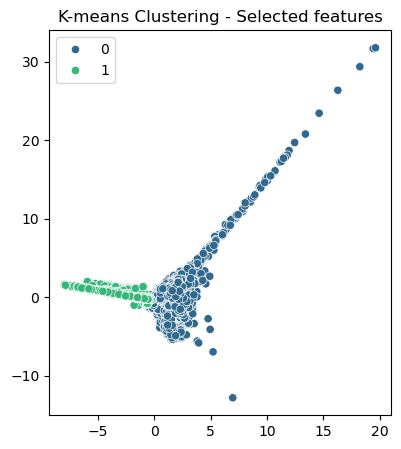

In [32]:
# Doing Clustering using K-means
kmeans_sel_features = KMeans(n_clusters=2, random_state=42)
kmeans_labels_sel_features = kmeans_sel_features.fit_predict(X_scaled_USP_sel_features)


# Using PCA for dimensionality reduction
pca_sel_features = PCA(n_components=2)
X_pca_sel_features = pca_sel_features.fit_transform(X_scaled_USP_sel_features)


# Silhouette Score
silhouette_kmeans_sel_features = silhouette_score(X_scaled_USP_sel_features, kmeans_labels_sel_features)
print(f'Silhouette Score - K-means: {silhouette_kmeans_sel_features}')

# Visualizing the clusters in reduced dimensionality using PCA
# K-means
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca_sel_features[:, 0], y=X_pca_sel_features[:, 1], hue=kmeans_labels_sel_features, palette='viridis', legend='full')
plt.title('K-means Clustering - Selected features')

plt.show()

# !-------------- 6. Model Training and Evaluation ------------------!

In [86]:
!pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 126.1 kB/s eta 0:16:31
   ---------------------------------------- 0.1/124.9 MB 153.2 kB/s eta 0:13:36
   ---------------------------------------- 0.1/124.9 MB 163.8 kB/s eta 0:12:42
   ---------------------------------------- 0.1/124

In [38]:
from xgboost import XGBClassifier

In [40]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled_sel_features, y_train_sel_features)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled_sel_features)

C:\Users\pc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:55:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
print(f'Actual : {y_test_sel_features[:10]}')
print(f'Predicted: {y_pred[:10]}')

Actual : 10650    1
2041     0
8668     0
1114     0
13902    1
11963    1
11072    1
3002     0
19771    1
8115     0
Name: label, dtype: int64
Predicted: [1 0 0 0 1 1 1 0 1 0]


# Confusion Metrix and Classification report of our model 

In [44]:
# Confusion metrix and classification report for out three models
XGB_accuracy_sf = accuracy_score(y_test_sel_features, y_pred)

XGB_conf_matrix_sf = confusion_matrix(y_test_sel_features, y_pred)
XGB_class_rep_sf = classification_report(y_test_sel_features, y_pred)

# Classification Report
print(f'XGBoost Model')
print(f'Accuracy: {XGB_accuracy_sf}')
print(f'Classification Report:\n{XGB_class_rep_sf}')
print('-' * 50)

XGBoost Model
Accuracy: 0.96875
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2019
           1       0.98      0.96      0.97      1981

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

--------------------------------------------------


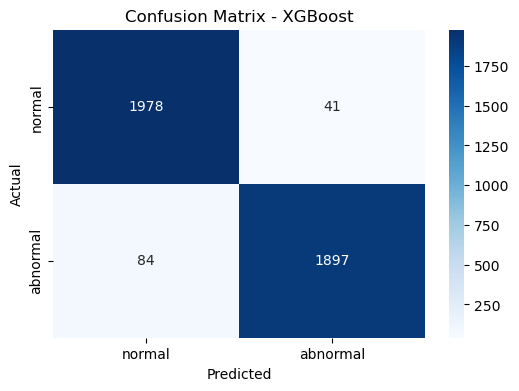

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(XGB_conf_matrix_sf, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], 
            yticklabels=['normal', 'abnormal'])
plt.title(f'Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# !------------------------- Model Validation ---------------------------!
 - Calculating Accuracy Score for the model by using Cross validation technique.
 - Reason for doing this is to validate our model performance

In [107]:
from sklearn.model_selection import cross_val_score


print('!---------------------------------------------------------------')
print('Cross Validation Results After selected features: ')
scores = cross_val_score(xgb_model, X_sel_features, y, cv=5)


print(f"Cross-validation scores for XGBoost model is : {scores}")
print(f"Mean CV score: {scores.mean()}")

!---------------------------------------------------------------
Cross Validation Results After selected features: 


C:\Users\pc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:33:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pc\anaconda3\Lib\site-packages\xgboost\core

Cross-validation scores for XGBoost model is : [0.96825 0.97125 0.969   0.967   0.97575]
Mean CV score: 0.9702500000000001
